In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset
#(How to Extract amazon reviews - Refer webscrapping using beautifulsoup(librarie).ipynb)
df=pd.read_csv("c:/Users/dell/Downloads/boatAirdopes-141 Reviews.csv")
df


,Unnamed: 0,Review
0,0,I have seen a lot of negative reviews for th...
1,1,Battery life on single charge says 6 hours o...
2,2,The best feature about this earphones is IWP...
3,3,"Reviewing this TWS approx. 4 months, and fou..."
4,4,I am writing a true review after around a we...
5,5,The media could not be loa...
6,6,Don't even think of buying it's made of bad ...
7,7,you really cant expect more from earbuds at ...
8,8,The media could not be loa...
9,9,Decent product. Fits comfortable in ears for...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40 non-null     int64 
 1   Review      40 non-null     object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [4]:
dfnew=df.drop(columns=['Unnamed: 0'])

In [5]:
dfnew

,Review
0,I have seen a lot of negative reviews for th...
1,Battery life on single charge says 6 hours o...
2,The best feature about this earphones is IWP...
3,"Reviewing this TWS approx. 4 months, and fou..."
4,I am writing a true review after around a we...
5,The media could not be loa...
6,Don't even think of buying it's made of bad ...
7,you really cant expect more from earbuds at ...
8,The media could not be loa...
9,Decent product. Fits comfortable in ears for...


In [6]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
cleaned_df = df.Review.apply(clean)
cleaned_df

0       i have seen a lot of negative reviews for th...
1       battery life on single charge says  hours on...
2       the best feature about this earphones is iwp...
3       reviewing this tws approx  months and found ...
4       i am writing a true review after around a we...
5                         the media could not be loa...
6       dont even think of buying its made of bad pl...
7       you really cant expect more from earbuds at ...
8                         the media could not be loa...
9       decent product fits comfortable in ears for ...
10      i am a programmer with a taste for music i l...
11      this airdopes  is good for first time user s...
12      there is constant hissing noise that remains...
13      guys you must note this when ever i play any...
14      worst product till now from boat the sound q...
15                                    super good sound 
16       about amazon i am highly disappointed from ...
17      there is some cracking sound in the left

In [8]:
#Word frequency
freq = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq

the        202
is         156
and        117
to          90
it          88
i           84
a           77
of          77
for         64
you         59
not         58
in          57
good        52
on          46
this        43
but         40
with        40
quality     35
its         34
are         32
dtype: int64

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
cleaned_df = cleaned_df.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq_Sw

good        52
quality     35
sound       29
battery     28
use         27
case        26
product     23
one         21
even        19
hours       19
airdopes    18
charge      17
also        16
music       16
time        16
bass        15
dont        15
like        15
charging    14
noise       14
dtype: int64

In [11]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(cleaned_df)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [12]:
word_freq_df.head(30)

,term,occurrences,frequency
0,able,1,0.000411
1,abruptly,1,0.000411
2,absent,1,0.000411
3,absolutely,1,0.000411
4,acceptable,4,0.001644
5,accha,1,0.000411
6,ace,1,0.000411
7,across,1,0.000411
8,action,3,0.001233
9,active,1,0.000411


In [13]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(cleaned_df)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [14]:
df

,able,abruptly,absent,absolutely,acceptable,accha,ace,action,active,additional,...,yahan,year,years,yeh,yes,youll,youre,youtube,zero,zindagi
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.144601,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142738,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.049313,0.000000,0.049313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.049313,0.000000,0.00000,0.000000,0.000000,0.000000,0.098625,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112501,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.101155,0.186210,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [16]:
top2_words = get_top_n2_words(cleaned_df, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,sound quality,13
1,battery life,8
2,noise cancellation,7
3,media could,6
4,could loaded,6


[Text(0, 0, 'sound quality'),
 Text(1, 0, 'battery life'),
 Text(2, 0, 'noise cancellation'),
 Text(3, 0, 'media could'),
 Text(4, 0, 'could loaded'),
 Text(5, 0, 'good sound'),
 Text(6, 0, 'price range'),
 Text(7, 0, 'right one'),
 Text(8, 0, 'quality good'),
 Text(9, 0, 'battery backup'),
 Text(10, 0, 'build quality'),
 Text(11, 0, 'single charge'),
 Text(12, 0, 'bass good'),
 Text(13, 0, 'also good'),
 Text(14, 0, 'boat airdopes'),
 Text(15, 0, 'latency lag'),
 Text(16, 0, 'quality bass'),
 Text(17, 0, 'single touch'),
 Text(18, 0, 'listen music'),
 Text(19, 0, 'one thing')]

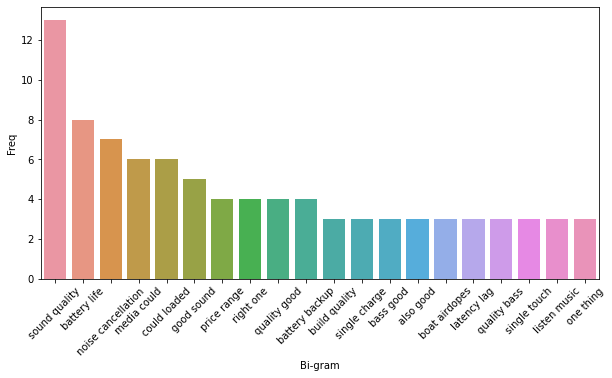

In [17]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [18]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [19]:
top3_words = get_top_n3_words(cleaned_df, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [20]:
top3_df

,Tri-gram,Freq
0,media could loaded,6
1,sound quality bass,3
2,passive noise cancellation,2
3,good price range,2
4,bass good mids,2
...,...,...
195,quality sound entry,1
196,sound entry level,1
197,level tws simply,1
198,tws simply amazing,1


[Text(0, 0, 'media could loaded'),
 Text(1, 0, 'sound quality bass'),
 Text(2, 0, 'passive noise cancellation'),
 Text(3, 0, 'good price range'),
 Text(4, 0, 'bass good mids'),
 Text(5, 0, 'latency lag voice'),
 Text(6, 0, 'voice call quality'),
 Text(7, 0, 'good battery life'),
 Text(8, 0, 'seen lot negative'),
 Text(9, 0, 'lot negative reviews'),
 Text(10, 0, 'negative reviews earbuds'),
 Text(11, 0, 'reviews earbuds however'),
 Text(12, 0, 'bad really cheap'),
 Text(13, 0, 'really cheap inr'),
 Text(14, 0, 'cheap inr build'),
 Text(15, 0, 'build quality taken'),
 Text(16, 0, 'quality taken hit'),
 Text(17, 0, 'taken hit however'),
 Text(18, 0, 'hit however matters'),
 Text(19, 0, 'matters sound quality')]

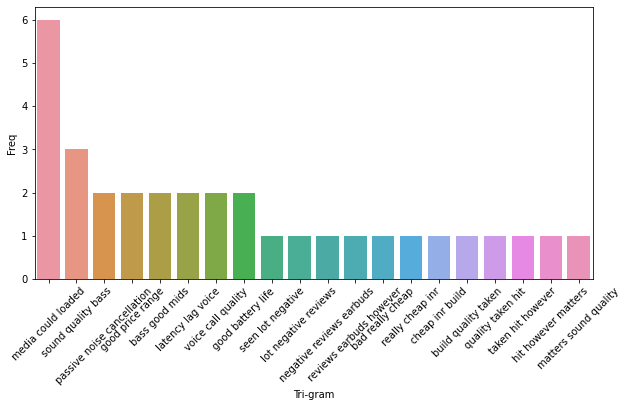

In [21]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [22]:
string_Total = " ".join(cleaned_df)

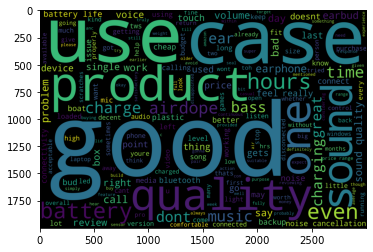

In [23]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 3000,
                height = 2000
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [24]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=string_Total
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [25]:
for token in doc_block[100:200]:
    print(token,token.pos_)  

charge NOUN
recommended VERB
music NOUN
case NOUN
bass NOUN
average ADJ
best ADJ
feature NOUN
earphones NOUN
iwp VERB
instant NOUN
wake VERB
pair NOUN
technology NOUN
open ADJ
lid ADJ
case NOUN
earphones NOUN
connect VERB
phonedevice NOUN
followed VERB
battery NOUN
backupthese ADJ
good ADJ
listening NOUN
music NOUN
binging VERB
videos NOUN
definitely ADV
suitable ADJ
workout NOUN
ratingvery NOUN
bad ADJ
calls NOUN
even ADV
though SCONJ
passive ADJ
noise NOUN
cancellation NOUN
virtue NOUN
fit ADJ
mics NOUN
sensitive ADJ
surrounding VERB
noise NOUN
do AUX
nt PART
pick VERB
want ADJ
use NOUN
calls NOUN
want VERB
use VERB
noisy ADJ
environmentthe PRON
led VERB
indicators NOUN
flashy ADJ
additional ADJ
aircraft NOUN
likeallover NOUN
steal PROPN
deal NOUN
price NOUN
stated VERB
purposehope NOUN
helps VERB
purchase VERB
decision NOUN
👍 NOUN
reviewing VERB
tws SCONJ
approx ADJ
months NOUN
found VERB
tws SCONJ
pretty ADV
good ADJ
price NOUN
range NOUN
ear NOUN
phones NOUN
comes VERB
rectangular

In [28]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['want', 'use', 'led', 'indicators', 'aircraft', 'likeallover', 'deal', 'price', 'stated', 'purposehope', 'helps', 'purchase', 'decision', '👍', 'reviewing', 'months', 'found', 'price', 'range', 'ear', 'phones', 'comes', 'charging', 'case', 'provides', 'charging', 'buds', 'case', 'built', 'material', 'plastic', 'plastic', 'looks', 'quality', 'shining', 'leds', 'case', 'gives', 'indicator', 'charging', 'case', 'charging', 'lit', 'increasing', 'gradient', 'show', 'case', 'charging', 'charged', 'case', 'leds', 'leds', 'lits', 'showing', 'case', 'chargedsound', 'quality', 'nutshell', 'contrary', 'expected', 'quality', 'sound', 'entry', 'level', 'bass', 'mids', 'tried', 'earphones', 'music', 'output', 'rate', 'sound', 'quality', 'scale', 'types', 'scope', 'mentionlatency', 'used', 'music', 'movies', 'games', 'worked', 'delay', 'observedcharging', 'time', 'working', 'point', 'review', 'months', 'beencomfort', 'weight', 'fits', 'ears', 'falls', 'walking', 'runningin', 'enjoy', 'music', 'nitpic

In [29]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,quality,35
1,battery,28
2,use,27
3,case,26
4,product,23
5,hours,19
6,sound,19
7,charge,17
8,music,16
9,time,16


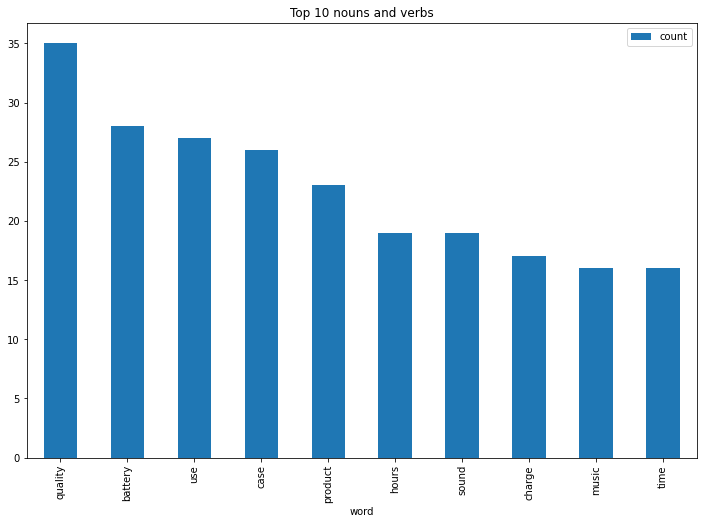

In [30]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [31]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(dfnew.Review))
sentences

['  I have seen a lot of negative reviews for these earbuds however, these are not bad at all.',
 'They are really cheap at 999 INR and the build quality has taken a hit, however, what matters is sound quality which is stellar for this price.',
 "I already own a lot of earbuds ranging from 999 to 10k and these for the price are great.The battery life though not as good as claimed however, 5 hours on the earbuds and close to 30-34 hours with the case is much better than the competition.I only have one gripe with these and that has to be the eartips, it's sort of an oval shape and you'll need to find proper seal so try all the different ear tips given in the box.",
 'Battery life on single charge says 6 hours on Amazon and it says 3 hours on Boat Website.',
 'This means that when battery life is mentioned, it is probably mentioned for single ear usage which is very unfair.',
 'So, for 3 hours that the website says, I get 45 to 75 minutes maximum.',
 'If your calls are lasting much longer

In [32]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I have seen a lot of negative reviews for th...
1,They are really cheap at 999 INR and the build...
2,I already own a lot of earbuds ranging from 99...
3,Battery life on single charge says 6 hours on ...
4,This means that when battery life is mentioned...
...,...
254,"Quality Average, But after using more than 30..."
255,I am really uncomfortable with this after used...
256,And I tried to return this only replacement is...
257,So I suggest people think before buying this A...


In [33]:
# Emotion Lexicon - Affin
affin=pd.read_csv('c:/Users/dell/Downloads/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [34]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [35]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [36]:
# manual testing
calculate_sentiment(text='great')

3

In [37]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     -5
1      1
2      6
3      0
4     -2
      ..
254   -2
255   -2
256    0
257    5
258   -1
Name: sentiment_value, Length: 259, dtype: int64

In [38]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      18
1      27
2      84
3      18
4      20
       ..
254    23
255    10
256    10
257    16
258     6
Name: word_count, Length: 259, dtype: int64

In [39]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
49,For daily use and those of you who listens to ...,-7,80
0,I have seen a lot of negative reviews for th...,-5,18
191,"Due to their ENC feature, I noticed electrical...",-4,33
69,Treble is terrible (for real).4.,-3,5
105,Box of the product was broken and bad in shape.3.,-3,10
...,...,...,...
160,However I will just give a short review.The so...,9,20
89,*At 60-70 volume label you can use it for 5-5:...,9,62
29,It fits good in ears and do not falls while wa...,9,28
55,!Don't know what to do where to exchange..Firs...,11,62


In [40]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    259.000000
mean       0.922780
std        2.952108
min       -7.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [41]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,I have seen a lot of negative reviews for th...,-5,18
3,Battery life on single charge says 6 hours on ...,0,18
4,This means that when battery life is mentioned...,-2,20
5,"So, for 3 hours that the website says, I get 4...",0,15
7,Every meeting I have it is so embarrassing to ...,-2,22
...,...,...,...
253,Lets see.,0,2
254,"Quality Average, But after using more than 30...",-2,23
255,I am really uncomfortable with this after used...,-2,10
256,And I tried to return this only replacement is...,0,10


In [42]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
1,They are really cheap at 999 INR and the build...,1,27
2,I already own a lot of earbuds ranging from 99...,6,84
6,If your calls are lasting much longer than thi...,1,12
8,Not recommended for music in any case as the B...,2,13
9,The best feature about this earphones is IWP (...,3,13
...,...,...,...
228,Looks cool!,1,2
243,Sound quality: definitely not good.,3,5
248,Sensor touch control is good though it is agai...,3,30
251,Voice call also is not great.,3,6


In [46]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I have seen a lot of negative reviews for th...,-5,18,0
1,They are really cheap at 999 INR and the build...,1,27,1
2,I already own a lot of earbuds ranging from 99...,6,84,2
3,Battery life on single charge says 6 hours on ...,0,18,3
4,This means that when battery life is mentioned...,-2,20,4
...,...,...,...,...
254,"Quality Average, But after using more than 30...",-2,23,254
255,I am really uncomfortable with this after used...,-2,10,255
256,And I tried to return this only replacement is...,0,10,256
257,So I suggest people think before buying this A...,5,16,257


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

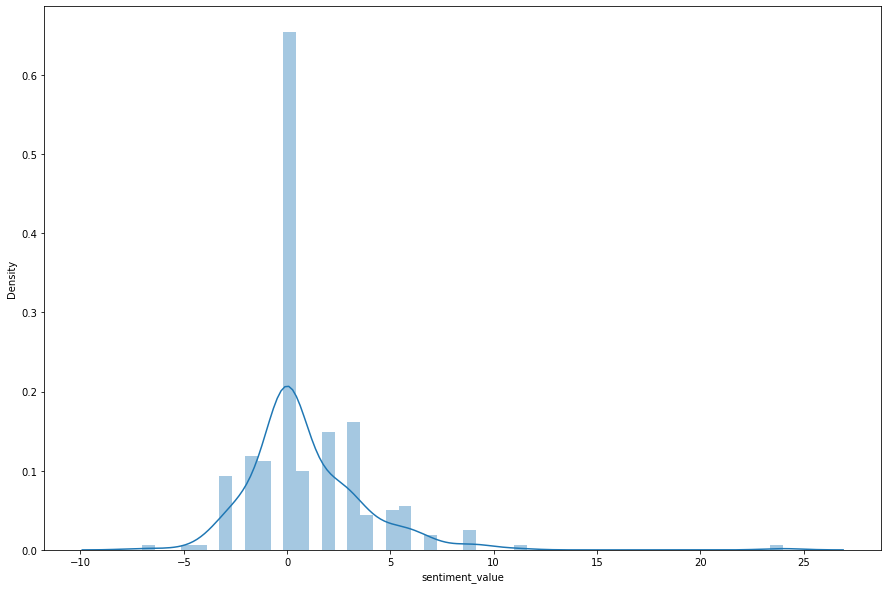

In [47]:
 # Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

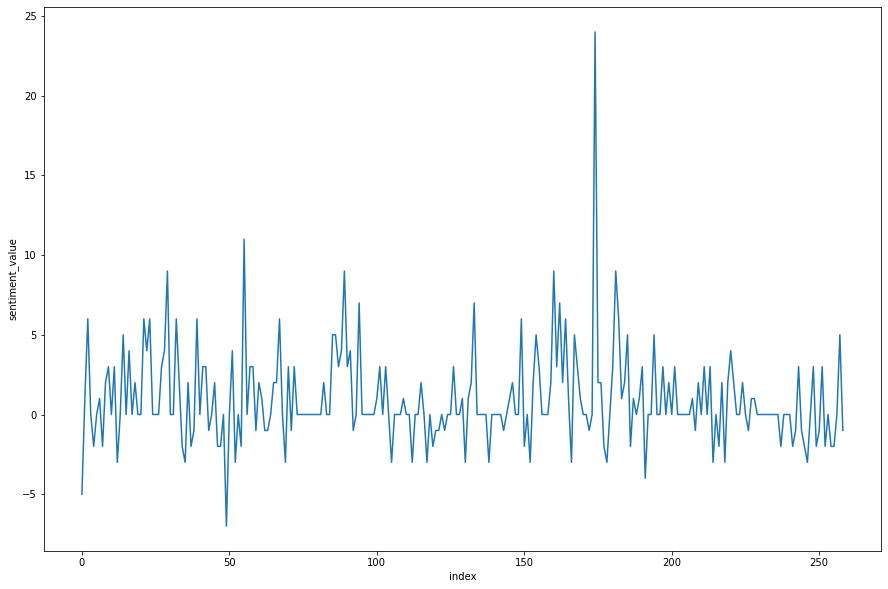

In [48]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

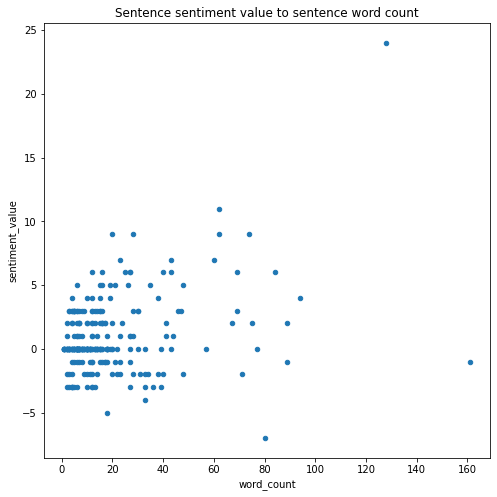

In [49]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [51]:
from nrclex import NRCLex

In [52]:
emotionx=[]
for i in range(len(cleaned_df)):
    emotion= NRCLex(cleaned_df[i])
    emotionx.append(emotion.top_emotions)
    print('\n',cleaned_df[i],':',emotion.top_emotions)


 seen lot negative reviews earbuds however bad really cheap inr build quality taken hit however matters sound quality stellar price already lot earbuds ranging price greatthe battery life though good claimed however hours earbuds close hours case much better competitioni one gripe eartips sort oval shape youll need find proper seal try different ear tips given box : [('positive', 0.23076923076923078), ('negative', 0.23076923076923078)]

 battery life single charge says hours amazon says hours boat website means battery life mentioned probably mentioned single ear usage unfair hours website says get minutes maximum calls lasting much longer please look elsewhere every meeting embarrassing change headset middle meeting saying charge recommended music case bass average : [('negative', 0.3)]

 best feature earphones iwp instant wake pair technology open lid case earphones connect phonedevice followed battery backupthese good listening music binging videos definitely suitable workout ratin

In [53]:
emotionx

[[('positive', 0.23076923076923078), ('negative', 0.23076923076923078)],
 [('negative', 0.3)],
 [('negative', 0.22727272727272727)],
 [('positive', 0.18181818181818182)],
 [('negative', 0.2391304347826087)],
 [('negative', 0.22857142857142856)],
 [('positive', 0.1875), ('negative', 0.1875)],
 [('trust', 0.2), ('positive', 0.2)],
 [('positive', 0.2222222222222222)],
 [('positive', 0.25)],
 [('positive', 0.23376623376623376)],
 [('positive', 0.2037037037037037)],
 [('negative', 0.3333333333333333)],
 [('negative', 0.2222222222222222), ('anticipation', 0.2222222222222222)],
 [('anger', 0.125),
  ('trust', 0.125),
  ('surprise', 0.125),
  ('positive', 0.125),
  ('negative', 0.125),
  ('disgust', 0.125),
  ('joy', 0.125),
  ('anticipation', 0.125)],
 [('trust', 0.2),
  ('surprise', 0.2),
  ('positive', 0.2),
  ('joy', 0.2),
  ('anticipation', 0.2)],
 [('negative', 0.2073170731707317)],
 [('negative', 0.5), ('anticipation', 0.5)],
 [('anger', 0.14285714285714285),
  ('negative', 0.1428571428

In [54]:
em = pd.DataFrame(emotionx,columns=['positive','negative','trust','surprise','joy','anticipation','fear','sadness','anger','digust'])

In [55]:
em

,positive,negative,trust,surprise,joy,anticipation,fear,sadness,anger,digust
0,"(positive, 0.23076923076923078)","(negative, 0.23076923076923078)",None,None,None,None,None,None,None,None
1,"(negative, 0.3)",None,None,None,None,None,None,None,None,None
2,"(negative, 0.22727272727272727)",None,None,None,None,None,None,None,None,None
3,"(positive, 0.18181818181818182)",None,None,None,None,None,None,None,None,None
4,"(negative, 0.2391304347826087)",None,None,None,None,None,None,None,None,None
5,"(negative, 0.22857142857142856)",None,None,None,None,None,None,None,None,None
6,"(positive, 0.1875)","(negative, 0.1875)",None,None,None,None,None,None,None,None
7,"(trust, 0.2)","(positive, 0.2)",None,None,None,None,None,None,None,None
8,"(positive, 0.2222222222222222)",None,None,None,None,None,None,None,None,None
9,"(positive, 0.25)",None,None,None,None,None,None,None,None,None
